In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
wine = datasets.load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['wine type'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine type
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
df['wine type'].unique()

array([0, 1, 2])

In [4]:
len(df['wine type'].unique())

3

In [5]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
wine_scaled = SS.fit_transform(wine.data)

In [6]:
input = wine_scaled
output = df['wine type']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input, output,
                                                   random_state=0)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [9]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
knn.score(X_test, y_test)

0.9555555555555556

In [11]:
knn = KNeighborsClassifier(n_neighbors=4)
knn2 = KNeighborsClassifier(n_neighbors=2)
knn3 = KNeighborsClassifier(n_neighbors=7)

In [12]:
knn.fit(X_train, y_train)
knn2.fit(X_train, y_train)
knn3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [13]:
knn.score(X_train, y_train), knn.score(X_test, y_test)

(0.9624060150375939, 0.9777777777777777)

In [14]:
knn2.score(X_train, y_train), knn2.score(X_test, y_test)

(0.9774436090225563, 0.9333333333333333)

In [15]:
knn3.score(X_train, y_train), knn3.score(X_test, y_test)

(0.9699248120300752, 1.0)

In [19]:
# Find best K value

acc_test = []
acc_train = []

for i in range(1, 100):
    knn_k = KNeighborsClassifier(n_neighbors=i)
    knn_k.fit(X_train, y_train)
    acc_test.append(knn_k.score(X_test, y_test))
    acc_train.append(knn_k.score(X_train, y_train))

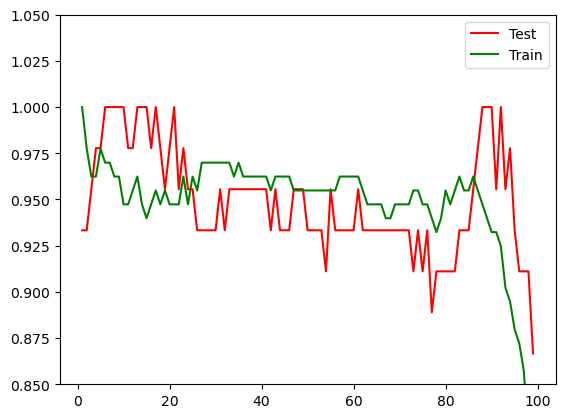

In [39]:
plt.plot(range(1, 100), acc_test, 'r', label="Test")
plt.plot(range(1, 100), acc_train, 'g', label="Train")
plt.legend()
plt.ylim(0.85, 1.05)
plt.show()

# 비슷한 성능이라면 계산속도를 위해 작은 k를 선택하는 것이 좋다.

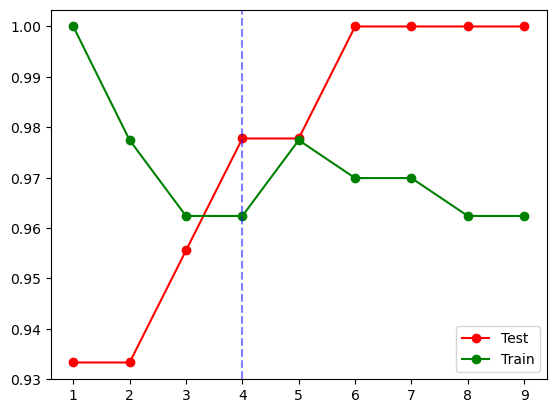

In [85]:
plt.plot(range(1, 10), acc_test[0:9], color='r', label="Test",
        marker='o')
plt.plot(range(1, 10), acc_train[0:9], color='g', label='Train',
        marker='o')
plt.axvline(x=4, linestyle='--', color='b', alpha=0.5)
# 이산형 자료이기 때문에 k가 4 이상일 때부터 성능이 좋다.(test >= train)
plt.legend()
plt.show()